In [15]:
# Now we will try to build an ODE of the form
# d^2u/dt^2 + w^2 u = 0

# This is a second order ODE
# Thus we will require two initial conditions, we can use u(0) and v(0)=du/dt(0)
# The solution is of the form
# u(t) = A cos(wt) + B sin(wt)
# Where A = u(0) and B = v(0)/w can be determined from the initial conditions and the characteristic equation

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Generate synthetic data for the example
def make_data(n_samples = 40000, t_max = 4 * np.pi): 
    # maximum time is the upper bound for random time samples, 
    # here we use 2 time periods, as T = 2π/w and w is in [0.5, 2.0], thus T is in [π, 4π]
    u0 = np.random.uniform(-1.5, 1.5, size=(n_samples, 1)) # initial position u(0)
    v0 = np.random.uniform(-1.0, 1.0, size=(n_samples, 1)) # initial velocity du/dt(0)
    w  = np.random.uniform(0.5, 2.0, size=(n_samples, 1))   # angular frequency ω
    t  = np.random.uniform(0.0, t_max, size=(n_samples, 1))

    # Analytical solution for the harmonic oscillator
    u = u0 * np.cos(w * t) + (v0 / w) * np.sin(w * t)

    X = np.hstack([u0, v0, w, t]).astype(np.float32)
    y = u.astype(np.float32)
    return X, y

In [19]:
# Creating activation function
def sin_activation(x):
    return tf.sin(x)

In [20]:
# Creating the dataset
X, y = make_data()
split = int(0.8 * len(X)) # 80-20 train-validation split

# Splitting into training and validation sets
X_train, y_train = X[:split], y[:split]
X_val, y_val = X[split:], y[split:]

In [21]:
# Defining the neural network model
model = models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(128, activation=sin_activation),
    layers.Dense(128, activation=sin_activation),
    layers.Dense(1) # Output layer is just a linear layer
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,281 (67.50 KB)

 Trainable params: 17,281 (67.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer=optimizers.Adam(1e-3), loss='mse')

In [23]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=40,
    batch_size=512,
    verbose=2
)

Epoch 1/40
63/63 - 1s - 13ms/step - loss: 0.5626 - val_loss: 0.5282
Epoch 2/40
63/63 - 0s - 3ms/step - loss: 0.5244 - val_loss: 0.5208
Epoch 3/40
63/63 - 0s - 3ms/step - loss: 0.5171 - val_loss: 0.5030
Epoch 4/40
63/63 - 0s - 3ms/step - loss: 0.5042 - val_loss: 0.4891
Epoch 5/40
63/63 - 0s - 2ms/step - loss: 0.4915 - val_loss: 0.4758
Epoch 6/40
63/63 - 0s - 3ms/step - loss: 0.4770 - val_loss: 0.4607
Epoch 7/40
63/63 - 0s - 3ms/step - loss: 0.4652 - val_loss: 0.4490
Epoch 8/40
63/63 - 0s - 3ms/step - loss: 0.4575 - val_loss: 0.4534
Epoch 9/40
63/63 - 0s - 3ms/step - loss: 0.4555 - val_loss: 0.4311
Epoch 10/40
63/63 - 0s - 3ms/step - loss: 0.4416 - val_loss: 0.4289
Epoch 11/40
63/63 - 0s - 3ms/step - loss: 0.4345 - val_loss: 0.4181
Epoch 12/40
63/63 - 0s - 3ms/step - loss: 0.4298 - val_loss: 0.4145
Epoch 13/40
63/63 - 0s - 3ms/step - loss: 0.4208 - val_loss: 0.4042
Epoch 14/40
63/63 - 0s - 3ms/step - loss: 0.4140 - val_loss: 0.3935
Epoch 15/40
63/63 - 0s - 3ms/step - loss: 0.4076 - val_l

In [24]:
# Testing the model on new data
u0_test = 1.0
v0_test = 0.0
w_test  = 1.2
t_grid  = np.linspace(0, 4*np.pi, 200).reshape(-1, 1).astype(np.float32)

X_test = np.hstack([
    np.full_like(t_grid, u0_test),
    np.full_like(t_grid, v0_test),
    np.full_like(t_grid, w_test),
    t_grid
])

u_pred = model.predict(X_test)
u_true = u0_test * np.cos(w_test * t_grid) + (v0_test / w_test) * np.sin(w_test * t_grid)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


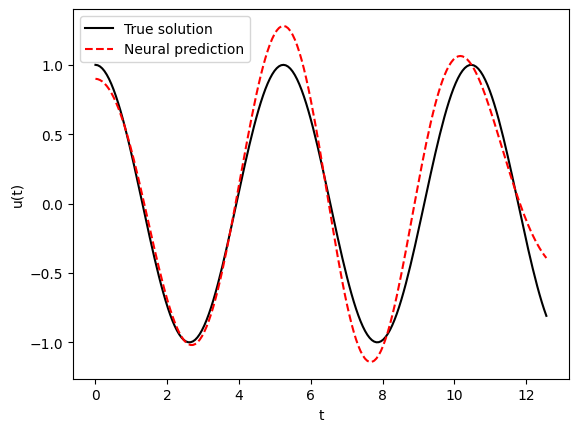

In [25]:
# Plotting the results
plt.plot(t_grid, u_true, 'k-', label='True solution')
plt.plot(t_grid, u_pred, 'r--', label='Neural prediction')
plt.xlabel("t")
plt.ylabel("u(t)")
plt.legend()
plt.show()